In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

## Padding a 2D mesh

This notebook shows how to pad a 2D mesh.

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


<IPython.core.display.Javascript object>


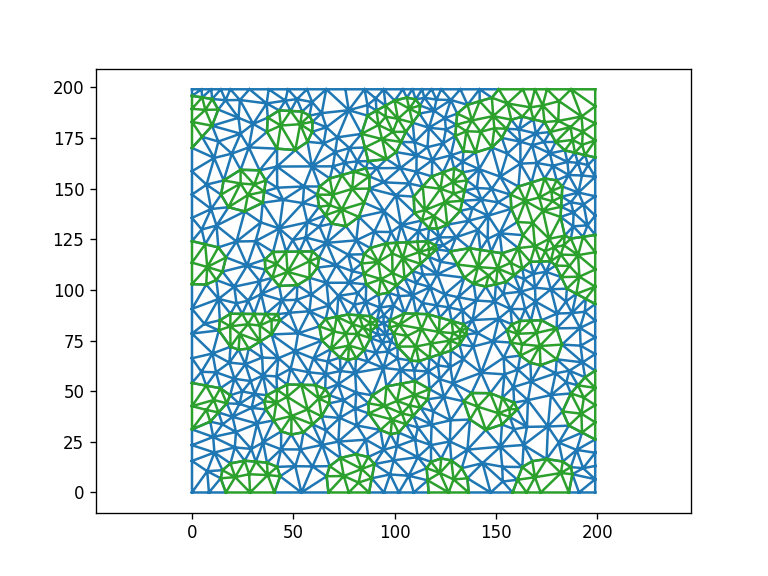

<AxesSubplot:>

In [2]:
from nanomesh.mesh_container import TriangleMesh

mesh = TriangleMesh.read(filename='out.msh')

# drop third dimension
mesh.drop_third_dimension()

# drop gmsh attributes
mesh.metadata.pop('gmsh:physical')
mesh.metadata.pop('gmsh:geometrical')

mesh.plot()

### Padding a mesh

The `.pad` method pads an array on the defined side with triangles. The width, mesh quality, and label assigned to this this area can be defined.

<IPython.core.display.Javascript object>


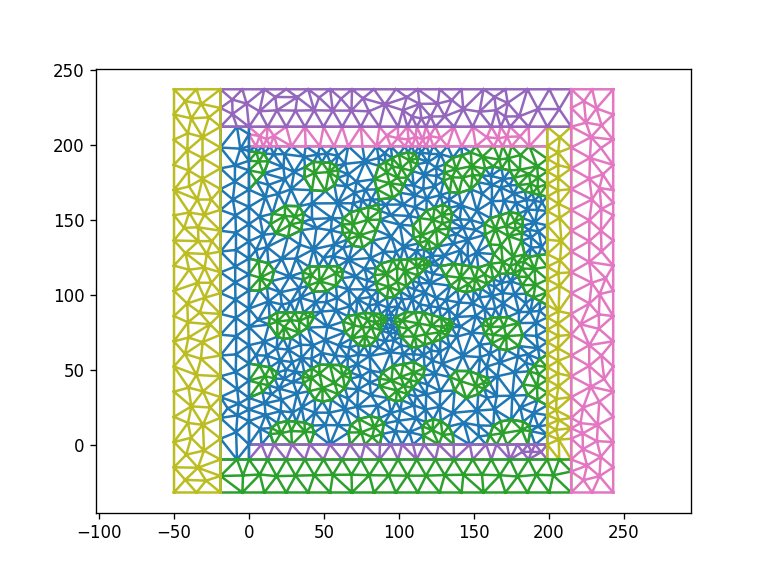

<AxesSubplot:>

In [3]:
for i, side in enumerate(('left', 'right', 'top', 'bottom', 'left', 'right', 'top', 'bottom')):
    width = 10 + 3*i
    mesh = mesh.pad(side=side, width=width, opts='q30a100', label=None)

mesh.plot()